# Curriculum Learning with GradCAM on ISIC images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing libraries and data

In [ ]:
!unzip '/content/drive/MyDrive/MetaLearningProject/skin-cancer-isic-master.zip'

Archive:  /content/drive/MyDrive/MetaLearningProject/skin-cancer-isic-master.zip
4089b556241c57a148867031654254e117edf98a
   creating: skin-cancer-isic-master/
  inflating: skin-cancer-isic-master/README.md  
   creating: skin-cancer-isic-master/data/
  inflating: skin-cancer-isic-master/data/ISIC_0000000.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000001.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000002.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000003.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000004.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000005.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000006.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000007.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000008.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000009.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000010.jpg  
  inflating: skin-cancer-isic-master/data/ISIC_0000011.jpg  
  inflating: ski

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
df_brain=pd.read_csv('/content/metadata.csv',dtype=str)

In [ ]:
df_brain

,_id,name,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,meta.clinical.mel_class,meta.clinical.mel_mitotic_index,meta.clinical.mel_thick_mm,meta.clinical.mel_type,meta.clinical.mel_ulcer,meta.clinical.melanocytic,meta.clinical.nevus_type,meta.clinical.patient_id,meta.clinical.personal_hx_mm,meta.clinical.sex,meta.acquisition.acquisition_day,meta.acquisition.blurry,meta.acquisition.color_tint,meta.acquisition.dermoscopic_type,meta.acquisition.hairy,meta.acquisition.image_type,meta.acquisition.marker_pen,meta.acquisition.pixelsX,meta.acquisition.pixelsY
0,5436e3abbae478396759f0cf,ISIC_0000000,55,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
1,5436e3acbae478396759f0d1,ISIC_0000001,30,anterior torso,benign,NaN,nevus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
2,5436e3acbae478396759f0d3,ISIC_0000002,60,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
3,5436e3acbae478396759f0d5,ISIC_0000003,30,upper extremity,benign,NaN,nevus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
4,5436e3acbae478396759f0d7,ISIC_0000004,80,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,558d636bbae47801cf734d4d,ISIC_0010615,50,lower extremity,benign,4.5,nevus,single image expert consensus,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768
595,558d636bbae47801cf734d50,ISIC_0010616,25,head/neck,benign,5.0,nevus,histopathology,False,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,False,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768
596,558d636cbae47801cf734d53,ISIC_0010617,40,lower extremity,benign,7.0,nevus,histopathology,False,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768
597,558d636cbae47801cf734d56,ISIC_0010618,40,anterior torso,benign,4.0,nevus,histopathology,False,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,False,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768


In [ ]:
list(df_brain)

['_id',
 'name',
 'meta.clinical.age_approx',
 'meta.clinical.anatom_site_general',
 'meta.clinical.benign_malignant',
 'meta.clinical.clin_size_long_diam_mm',
 'meta.clinical.diagnosis',
 'meta.clinical.diagnosis_confirm_type',
 'meta.clinical.family_hx_mm',
 'meta.clinical.lesion_id',
 'meta.clinical.mel_class',
 'meta.clinical.mel_mitotic_index',
 'meta.clinical.mel_thick_mm',
 'meta.clinical.mel_type',
 'meta.clinical.mel_ulcer',
 'meta.clinical.melanocytic',
 'meta.clinical.nevus_type',
 'meta.clinical.patient_id',
 'meta.clinical.personal_hx_mm',
 'meta.clinical.sex',
 'meta.acquisition.acquisition_day',
 'meta.acquisition.blurry',
 'meta.acquisition.color_tint',
 'meta.acquisition.dermoscopic_type',
 'meta.acquisition.hairy',
 'meta.acquisition.image_type',
 'meta.acquisition.marker_pen',
 'meta.acquisition.pixelsX',
 'meta.acquisition.pixelsY']

In [ ]:
df_brain=df_brain[['name','meta.clinical.benign_malignant']]

In [ ]:
df_brain.head()

,name,meta.clinical.benign_malignant
0,ISIC_0000000,benign
1,ISIC_0000001,benign
2,ISIC_0000002,malignant
3,ISIC_0000003,benign
4,ISIC_0000004,malignant


In [ ]:
df_brain['meta.clinical.benign_malignant']=pd.get_dummies(df_brain['meta.clinical.benign_malignant'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_brain.head()

,name,meta.clinical.benign_malignant
0,ISIC_0000000,1
1,ISIC_0000001,1
2,ISIC_0000002,0
3,ISIC_0000003,1
4,ISIC_0000004,0


In [ ]:
df_brain['meta.clinical.benign_malignant']= df_brain['meta.clinical.benign_malignant'].astype(str)
df_brain['name'] = df_brain['name'] + '.jpg'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_brain.dtypes

name                              object
meta.clinical.benign_malignant    object
dtype: object

In [ ]:
df_brain.head()

,name,meta.clinical.benign_malignant
0,ISIC_0000000.jpg,1
1,ISIC_0000001.jpg,1
2,ISIC_0000002.jpg,0
3,ISIC_0000003.jpg,1
4,ISIC_0000004.jpg,0


In [ ]:
import glob

In [ ]:
!pip install split-folders

In [ ]:
!mkdir '/content/Skin_data'

In [ ]:
import splitfolders
splitfolders.ratio("/content/skin-cancer-isic-master", output="/content/Skin_data", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 600 files [00:00, 1989.23 files/s]


In [ ]:
image_size=150
batch_size = 16

## Making the pandas dataframe

### Train Data

In [ ]:
names=[]
for i in glob.glob('/content/Skin_data/train/data/'+'*.jpg'):
  names.append(i.strip('/content/Skin_data/train/data/'))
d2={'name':names}
df2=pd.DataFrame(d2)

In [ ]:
df2

,name
0,ISIC_0010501.jpg
1,ISIC_0010582.jpg
2,ISIC_0000172.jpg
3,ISIC_0010516.jpg
4,ISIC_0000264.jpg
...,...
475,ISIC_0010551.jpg
476,ISIC_0010599.jpg
477,ISIC_0010499.jpg
478,ISIC_0010530.jpg


In [ ]:
train_df = df2.merge(df_brain[["name","meta.clinical.benign_malignant"]], on="name", how="left")

In [ ]:
train_df.head()

,name,meta.clinical.benign_malignant
0,ISIC_0010501.jpg,1
1,ISIC_0010582.jpg,1
2,ISIC_0000172.jpg,0
3,ISIC_0010516.jpg,0
4,ISIC_0000264.jpg,1


In [ ]:
train_df.dtypes

name                              object
meta.clinical.benign_malignant    object
dtype: object

### Val data

In [ ]:
names=[]
for i in glob.glob('/content/Skin_data/val/data/'+'*.jpg'):
  names.append(i.strip('/content/Skin_data/val/data/'))
d2={'name':names}
df2=pd.DataFrame(d2)

In [ ]:
val_df = df2.merge(df_brain[["name","meta.clinical.benign_malignant"]], on="name", how="left")

In [ ]:
train_df['meta.clinical.benign_malignant']=train_df['meta.clinical.benign_malignant'].astype(str)
val_df['meta.clinical.benign_malignant']=val_df['meta.clinical.benign_malignant'].astype(str)

In [ ]:
train_df=train_df[~train_df['meta.clinical.benign_malignant'].str.contains('nan')]

In [ ]:
val_df

,name,meta.clinical.benign_malignant
0,ISIC_0000107.jpg,1
1,ISIC_0000213.jpg,1
2,ISIC_0000196.jpg,1
3,ISIC_0000070.jpg,0
4,ISIC_0000169.jpg,0
...,...,...
115,ISIC_0010486.jpg,0
116,ISIC_0010338.jpg,1
117,ISIC_0010334.jpg,1
118,ISIC_0000170.jpg,0


## Image data gen

In [ ]:
data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                             rescale=1./255,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )
            
data_generator_no_aug = ImageDataGenerator(rescale=1./255,)

In [ ]:
train_generator=data_generator_with_aug.flow_from_dataframe(
dataframe=train_df,
directory="/content/Skin_data/train/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
subset="training",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 479 validated image filenames belonging to 2 classes.


In [ ]:
val_generator=data_generator_with_aug.flow_from_dataframe(
dataframe=val_df,
directory="/content/Skin_data/val/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 120 validated image filenames belonging to 2 classes.


## Resnet 50 Model

In [ ]:
num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


x=ResNet50(include_top=False, pooling='avg',weights=None,input_shape=(150,150,3))
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x.output)

model = tf.keras.Model(inputs=x.input, outputs=outputs)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2397"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1200 (InputLayer)         [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1200[0][0]                 
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_________________________________________________________________________________________

## Training normally

In [ ]:
nb_train_samples = 479 # number of files in training set
batch_size = 16
STEPS = nb_train_samples / batch_size

### Training Direct

In [ ]:
train_generator_x=data_generator_with_aug.flow_from_dataframe(
dataframe=train_df,
directory="/content/Skin_data/train/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
subset="training",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(150,150))
val_generator_x=data_generator_with_aug.flow_from_dataframe(
dataframe=val_df,
directory="/content/Skin_data/val/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(150,150))

Found 479 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.


Epoch 1/60
29/29 [==============================] - 20s 509ms/step - loss: 1.3900 - accuracy: 0.6716 - val_loss: 0.6540 - val_accuracy: 0.7667
Epoch 2/60
29/29 [==============================] - 14s 461ms/step - loss: 0.7054 - accuracy: 0.6922 - val_loss: 0.6075 - val_accuracy: 0.7667
Epoch 3/60
29/29 [==============================] - 14s 463ms/step - loss: 0.6081 - accuracy: 0.7123 - val_loss: 0.5478 - val_accuracy: 0.7667
Epoch 4/60
29/29 [==============================] - 14s 467ms/step - loss: 0.6237 - accuracy: 0.7351 - val_loss: 0.5807 - val_accuracy: 0.7667
Epoch 5/60
29/29 [==============================] - 14s 467ms/step - loss: 0.6043 - accuracy: 0.7254 - val_loss: 0.5781 - val_accuracy: 0.7833
Epoch 6/60
29/29 [==============================] - 14s 464ms/step - loss: 0.6115 - accuracy: 0.7217 - val_loss: 0.5800 - val_accuracy: 0.7667
Epoch 7/60
29/29 [==============================] - 14s 468ms/step - loss: 0.6306 - accuracy: 0.6864 - val_loss: 0.5435 - val_accuracy: 0.7667

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 78.33%


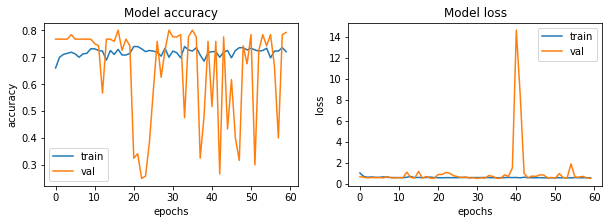

In [ ]:

history_x=model.fit(
       train_generator_x, # specify where model gets training data
       epochs = 60,
       steps_per_epoch=STEPS,
       validation_data=val_generator_x) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(val_generator_x)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history_x.history[met])
    ax[i].plot(history_x.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


## Zeroth Iteration

In [ ]:
history=model.fit(
       train_generator, # specify where model gets training data
       epochs = 20,
       steps_per_epoch=STEPS,
       validation_data=val_generator) # specify where model gets validation data



Epoch 1/20
29/29 [==============================] - 18s 571ms/step - loss: 1.1790 - accuracy: 0.6493 - val_loss: 1.0120 - val_accuracy: 0.2333
Epoch 2/20
29/29 [==============================] - 14s 484ms/step - loss: 0.6562 - accuracy: 0.6973 - val_loss: 0.5713 - val_accuracy: 0.7667
Epoch 3/20
29/29 [==============================] - 15s 492ms/step - loss: 0.6348 - accuracy: 0.7056 - val_loss: 0.5661 - val_accuracy: 0.7667
Epoch 4/20
29/29 [==============================] - 15s 489ms/step - loss: 0.6311 - accuracy: 0.7077 - val_loss: 0.5926 - val_accuracy: 0.7667
Epoch 5/20
29/29 [==============================] - 14s 484ms/step - loss: 0.6626 - accuracy: 0.6764 - val_loss: 0.7960 - val_accuracy: 0.3250
Epoch 6/20
29/29 [==============================] - 15s 486ms/step - loss: 0.6771 - accuracy: 0.6868 - val_loss: 0.6604 - val_accuracy: 0.7667
Epoch 7/20
29/29 [==============================] - 14s 480ms/step - loss: 0.5786 - accuracy: 0.7161 - val_loss: 0.7757 - val_accuracy: 0.7667

In [ ]:
# Evaluate the model
scores = model.evaluate_generator(val_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 55.00%


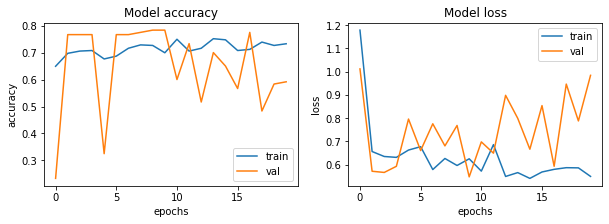

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
#model.save('/content/drive/MyDrive/MetaLearningProject/KerasNumpyFiles/Resnet_brain_1.h5')
#model.save('/content/drive/MyDrive/CurriculumLearning/CurriculumLearning_part1.h5')

In [ ]:
import PIL

## Heatmap trials

In [ ]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    array=array.astype('float')/255
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    #heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap)-np.min(heatmap))
    return heatmap


In [ ]:
last_conv_layer_name = "conv5_block3_3_conv"
#classifier_layer_names = ['dense','dense_1','dense_2','dense_3','global_average_pooling2d','dropout','dense_4']
#'conv5_block3_3_bn','conv5_block3_add','conv5_block3_out',
classifier_layer_names = ['avg_pool','dense']

In [ ]:
train_directory="/content/Skin_data/train/data/"
val_directory="/content/Skin_data/val/data"

In [ ]:
import cv2
import numpy as np
import os
import statistics
import math
from statistics import variance

In [ ]:
red_var_train=[]
red_var_val=[]

In [ ]:
'''
def red_variance(imag):
  img = cv2.imread(imag, cv2.IMREAD_COLOR)
  img=img.astype('float')
  height, width, channels = img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  m_b = imgBox.T [0] .flatten (). mean ()
  m_g = imgBox.T [1] .flatten (). mean ()
  m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  v_b = imgBox.T [0] .flatten ()
  v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  v_b = variance (v_b)
  v_g = variance (v_g)
  v_r = variance (v_r)
  return (v_r)
'''

"\ndef red_variance(imag):\n  img = cv2.imread(imag, cv2.IMREAD_COLOR)\n  img=img.astype('float')\n  height, width, channels = img.shape\n  # Cut out the target range\n  boxFromX = 0 # start range X coordinate\n  boxFromY = 0 # target range start position Y coordinate\n  boxToX = width # target range end position X coordinate\n  boxToY = height # target range end position Y coordinate\n  # set in the order of y: y + h, x: x + w\n  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]\n  # Output RGB mean and variance\n  # One-dimensionalize with flatten and get average with mean\n  m_b = imgBox.T [0] .flatten (). mean ()\n  m_g = imgBox.T [1] .flatten (). mean ()\n  m_r = imgBox.T [2] .flatten (). mean ()\n  # Get one-dimensional with flatten and get variance with variance\n  v_b = imgBox.T [0] .flatten ()\n  v_g = imgBox.T [1] .flatten ()\n  v_r = imgBox.T [2] .flatten ()\n  v_b = variance (v_b)\n  v_g = variance (v_g)\n  v_r = variance (v_r)\n  return (v_r)\n"

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#train_images_list=[i for i in glob.glob(train_directory+'*.jpg')]

In [ ]:
#i='/content/Brain_data/train/Brain Tumor/Image10.jpg'
#img_array_positive = (get_img_array(i, size=(150,150)))
#heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
#plt.matshow(heatmap)
#plt.show()

In [ ]:
'''
i='/content/Brain_data/train/Brain Tumor/Image10.jpg'
img_array_positive = (get_img_array(i, size=(150,150)))
heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
plt.matshow(heatmap)
plt.show()
img = keras.preprocessing.image.load_img(i)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
'''

'\ni=\'/content/Brain_data/train/Brain Tumor/Image10.jpg\'\nimg_array_positive = (get_img_array(i, size=(150,150)))\nheatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)\nplt.matshow(heatmap)\nplt.show()\nimg = keras.preprocessing.image.load_img(i)\nimg = keras.preprocessing.image.img_to_array(img)\n\n# We rescale heatmap to a range 0-255\nheatmap = np.uint8(255 * heatmap)\n\n# We use jet colormap to colorize heatmap\njet = cm.get_cmap("jet")\n\n# We use RGB values of the colormap\njet_colors = jet(np.arange(256))[:, :3]\njet_heatmap = jet_colors[heatmap]\n\n# We create an image with RGB colorized heatmap\njet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)\njet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))\njet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)\n\n# Superimpose the heatmap on original image\nsuperimposed_img = jet_heatmap * 0.4 + img\nsuperimposed_img = keras.preprocessing.image.a

In [ ]:
#plt.matshow(superimposed_img)
#plt.show()

In [ ]:
#type(superimposed_img)

In [ ]:
#type(heatmap)

In [ ]:
'''
img=np.array(superimposed_img)
img=img.astype('float')
height, width,channel= img.shape
# Cut out the target range
boxFromX = 0 # start range X coordinate
boxFromY = 0 # target range start position Y coordinate
boxToX = width # target range end position X coordinate
boxToY = height # target range end position Y coordinate
# set in the order of y: y + h, x: x + w
imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
# Output RGB mean and variance
# One-dimensionalize with flatten and get average with mean
m_b = imgBox.T [0] .flatten (). mean ()
m_g = imgBox.T [1] .flatten (). mean ()
m_r = imgBox.T [2] .flatten (). mean ()
# Get one-dimensional with flatten and get variance with variance
v_b = imgBox.T [0] .flatten ()
v_g = imgBox.T [1] .flatten ()
v_r = imgBox.T [2] .flatten ()
v_b = variance (v_b)
v_g = variance (v_g)
v_r = variance (v_r)
'''

"\nimg=np.array(superimposed_img)\nimg=img.astype('float')\nheight, width,channel= img.shape\n# Cut out the target range\nboxFromX = 0 # start range X coordinate\nboxFromY = 0 # target range start position Y coordinate\nboxToX = width # target range end position X coordinate\nboxToY = height # target range end position Y coordinate\n# set in the order of y: y + h, x: x + w\nimgBox = img [boxFromY: boxToY, boxFromX: boxToX]\n# Output RGB mean and variance\n# One-dimensionalize with flatten and get average with mean\nm_b = imgBox.T [0] .flatten (). mean ()\nm_g = imgBox.T [1] .flatten (). mean ()\nm_r = imgBox.T [2] .flatten (). mean ()\n# Get one-dimensional with flatten and get variance with variance\nv_b = imgBox.T [0] .flatten ()\nv_g = imgBox.T [1] .flatten ()\nv_r = imgBox.T [2] .flatten ()\nv_b = variance (v_b)\nv_g = variance (v_g)\nv_r = variance (v_r)\n"

In [ ]:
#v_r

In [ ]:
#v_b

In [ ]:
#v_g

# 1st Iteration on Curriculum Learning

## Heatmap Variance generation 

### Train data

In [ ]:
train_name_list=train_df['name'].to_list()

In [ ]:
train_name_list

['ISIC_0010501.jpg',
 'ISIC_0010582.jpg',
 'ISIC_0000172.jpg',
 'ISIC_0010516.jpg',
 'ISIC_0000264.jpg',
 'ISIC_0000072.jpg',
 'ISIC_0010590.jpg',
 'ISIC_0010354.jpg',
 'ISIC_0010355.jpg',
 'ISIC_0010395.jpg',
 'ISIC_0010378.jpg',
 'ISIC_0000048.jpg',
 'ISIC_0010321.jpg',
 'ISIC_0000214.jpg',
 'ISIC_0000052.jpg',
 'ISIC_0010587.jpg',
 'ISIC_0000156.jpg',
 'ISIC_0010616.jpg',
 'ISIC_0000028.jpg',
 'ISIC_0000258.jpg',
 'ISIC_0010533.jpg',
 'ISIC_0000171.jpg',
 'ISIC_0010392.jpg',
 'ISIC_0010585.jpg',
 'ISIC_0010367.jpg',
 'ISIC_0000220.jpg',
 'ISIC_0000154.jpg',
 'ISIC_0010513.jpg',
 'ISIC_0000262.jpg',
 'ISIC_0000206.jpg',
 'ISIC_0010615.jpg',
 'ISIC_0000181.jpg',
 'ISIC_0010383.jpg',
 'ISIC_0010493.jpg',
 'ISIC_0000216.jpg',
 'ISIC_0010453.jpg',
 'ISIC_0000097.jpg',
 'ISIC_0000186.jpg',
 'ISIC_0000135.jpg',
 'ISIC_0000036.jpg',
 'ISIC_0000114.jpg',
 'ISIC_0000087.jpg',
 'ISIC_0000112.jpg',
 'ISIC_0000238.jpg',
 'ISIC_0010556.jpg',
 'ISIC_0000157.jpg',
 'ISIC_0000144.jpg',
 'ISIC_001041

In [ ]:
#train_name_list

In [ ]:
red_variance_train=[]

In [ ]:
for i in train_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/train/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/train/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_train.append(v_r)

In [ ]:
#red_variance_train=red_variance_train[10:]

In [ ]:
len(red_variance_train)

479

In [ ]:
train_df['red_variance']=red_variance_train

In [ ]:
train_df.head()

,name,meta.clinical.benign_malignant,red_variance
0,ISIC_0010501.jpg,1,1738.929163
1,ISIC_0010582.jpg,1,939.483954
2,ISIC_0000172.jpg,0,2465.009923
3,ISIC_0010516.jpg,0,886.347001
4,ISIC_0000264.jpg,1,2669.259538


### Val data

In [ ]:
val_name_list=val_df['name'].to_list()

In [ ]:
red_variance_val=[]

In [ ]:
for i in val_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/val/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/val/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_val.append(v_r)

In [ ]:
val_df['red_variance']=red_variance_val

## Sorting based on the variance values

In [ ]:
train_df_sorted=train_df.sort_values(by=['red_variance'])
val_df_sorted=val_df.sort_values(by=['red_variance'])

In [ ]:
train_df_sorted.head()

,name,meta.clinical.benign_malignant,red_variance
84,ISIC_0010528.jpg,1,217.709571
437,ISIC_0010345.jpg,1,287.484079
401,ISIC_0010611.jpg,0,303.224236
51,ISIC_0010424.jpg,1,327.323102
416,ISIC_0000298.jpg,0,343.044880


In [ ]:
list(train_df_sorted)

['name', 'meta.clinical.benign_malignant', 'red_variance']

In [ ]:
list(train_df_sorted['meta.clinical.benign_malignant'])

['1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0'

In [ ]:
train_df_sorted['meta.clinical.benign_malignant']=train_df_sorted['meta.clinical.benign_malignant'].astype(str)
val_df_sorted['meta.clinical.benign_malignant']=val_df_sorted['meta.clinical.benign_malignant'].astype(str)


In [ ]:
#df[~df.C.str.contains("XYZ")]
train_df_sorted=train_df_sorted[~train_df_sorted['meta.clinical.benign_malignant'].str.contains('nan')]

## Using new dataframes for the image generators

In [ ]:
train_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=train_df_sorted,
directory="/content/Skin_data/train/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
subset="training",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 479 validated image filenames belonging to 2 classes.


In [ ]:
val_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=val_df_sorted,
directory="/content/Skin_data/val/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 120 validated image filenames belonging to 2 classes.


## Training model again

In [ ]:
history=model.fit(
       train_generator_sorted, # specify where model gets training data
       epochs = 20,
       steps_per_epoch=STEPS,
       validation_data=val_generator_sorted) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(val_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
29/29 [==============================] - 15s 487ms/step - loss: 0.6159 - accuracy: 0.7077 - val_loss: 1.0865 - val_accuracy: 0.5500
Epoch 2/20
29/29 [==============================] - 14s 482ms/step - loss: 0.6204 - accuracy: 0.7119 - val_loss: 1.3041 - val_accuracy: 0.2583
Epoch 3/20
29/29 [==============================] - 14s 475ms/step - loss: 0.5503 - accuracy: 0.7328 - val_loss: 1.1199 - val_accuracy: 0.3667
Epoch 4/20
29/29 [==============================] - 14s 478ms/step - loss: 0.6006 - accuracy: 0.7182 - val_loss: 1.0520 - val_accuracy: 0.4500
Epoch 5/20
29/29 [==============================] - 15s 502ms/step - loss: 0.5900 - accuracy: 0.6994 - val_loss: 0.8328 - val_accuracy: 0.7500
Epoch 6/20
29/29 [==============================] - 15s 498ms/step - loss: 0.5829 - accuracy: 0.7203 - val_loss: 0.6806 - val_accuracy: 0.6667
Epoch 7/20
29/29 [==============================] - 14s 470ms/step - loss: 0.5559 - accuracy: 0.7390 - val_loss: 0.8383 - val_accuracy: 0.7083

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 64.17%


In [ ]:
model.save('/content/drive/MyDrive/CurriculumLearning/CurriculumLearningSkinISIC_part2.h5')

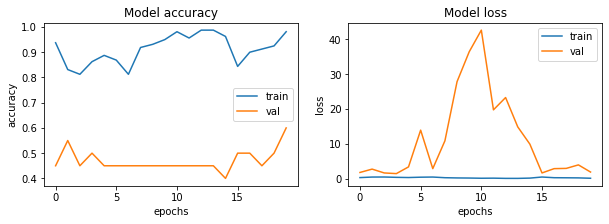

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# 2nd Iteration of Curriculum Learning

## Heatmap Variance 2

### Train data

In [ ]:
red_variance_train.clear()

In [ ]:
train_df_sorted.head()

,name,meta.clinical.benign_malignant,red_variance
84,ISIC_0010528.jpg,1,217.709571
437,ISIC_0010345.jpg,1,287.484079
401,ISIC_0010611.jpg,0,303.224236
51,ISIC_0010424.jpg,1,327.323102
416,ISIC_0000298.jpg,0,343.044880


In [ ]:
train_df.head()

,name,meta.clinical.benign_malignant,red_variance
0,ISIC_0010501.jpg,1,1738.929163
1,ISIC_0010582.jpg,1,939.483954
2,ISIC_0000172.jpg,0,2465.009923
3,ISIC_0010516.jpg,0,886.347001
4,ISIC_0000264.jpg,1,2669.259538


In [ ]:
del train_df_sorted['red_variance']

In [ ]:
train_name_list=train_df_sorted['name'].to_list()
#train_name_list=train_df['Image'].to_list()

In [ ]:
train_name_list

['ISIC_0010528.jpg',
 'ISIC_0010345.jpg',
 'ISIC_0010611.jpg',
 'ISIC_0010424.jpg',
 'ISIC_0000298.jpg',
 'ISIC_0010466.jpg',
 'ISIC_0010512.jpg',
 'ISIC_0010518.jpg',
 'ISIC_0010617.jpg',
 'ISIC_0010372.jpg',
 'ISIC_0010613.jpg',
 'ISIC_0010565.jpg',
 'ISIC_0010434.jpg',
 'ISIC_0010363.jpg',
 'ISIC_0010551.jpg',
 'ISIC_0010467.jpg',
 'ISIC_0000024.jpg',
 'ISIC_0010476.jpg',
 'ISIC_0010395.jpg',
 'ISIC_0010530.jpg',
 'ISIC_0010529.jpg',
 'ISIC_0000102.jpg',
 'ISIC_0000050.jpg',
 'ISIC_0010405.jpg',
 'ISIC_0000026.jpg',
 'ISIC_0010456.jpg',
 'ISIC_0010357.jpg',
 'ISIC_0010441.jpg',
 'ISIC_0010324.jpg',
 'ISIC_0010499.jpg',
 'ISIC_0010347.jpg',
 'ISIC_0010569.jpg',
 'ISIC_0010444.jpg',
 'ISIC_0010557.jpg',
 'ISIC_0010563.jpg',
 'ISIC_0010478.jpg',
 'ISIC_0010438.jpg',
 'ISIC_0000010.jpg',
 'ISIC_0010609.jpg',
 'ISIC_0010601.jpg',
 'ISIC_0010542.jpg',
 'ISIC_0010584.jpg',
 'ISIC_0010453.jpg',
 'ISIC_0010431.jpg',
 'ISIC_0010545.jpg',
 'ISIC_0000033.jpg',
 'ISIC_0010506.jpg',
 'ISIC_001037

In [ ]:
for i in train_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/train/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/train/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_train.append(v_r)

In [ ]:
train_df_sorted['red_variance']=red_variance_train

In [ ]:
train_df_sorted=train_df_sorted.sort_values(by=['red_variance'])

### Val data

In [ ]:
red_variance_val.clear()

In [ ]:
del val_df_sorted['red_variance']

In [ ]:
val_name_list=val_df_sorted['name'].to_list()

In [ ]:
for i in val_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/val/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/val/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_val.append(v_r)

In [ ]:
val_df_sorted['red_variance']=red_variance_val

In [ ]:
val_df_sorted=val_df_sorted.sort_values(by=['red_variance'])

## Using new dataframes for the image generators 2

In [ ]:
train_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=train_df_sorted,
directory="/content/Skin_data/train/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
subset="training",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 479 validated image filenames belonging to 2 classes.


In [ ]:
val_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=val_df_sorted,
directory="/content/Skin_data/val/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 120 validated image filenames belonging to 2 classes.


## Training model again 2

In [ ]:
history=model.fit(
       train_generator_sorted, # specify where model gets training data
       epochs = 20,
       steps_per_epoch=STEPS,
       validation_data=val_generator_sorted) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(val_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
29/29 [==============================] - 14s 483ms/step - loss: 0.5674 - accuracy: 0.7370 - val_loss: 1.0009 - val_accuracy: 0.4750
Epoch 2/20
29/29 [==============================] - 14s 464ms/step - loss: 0.5655 - accuracy: 0.7349 - val_loss: 0.7347 - val_accuracy: 0.5083
Epoch 3/20
29/29 [==============================] - 14s 464ms/step - loss: 0.5603 - accuracy: 0.7265 - val_loss: 0.8979 - val_accuracy: 0.4000
Epoch 4/20
29/29 [==============================] - 14s 461ms/step - loss: 0.5466 - accuracy: 0.7265 - val_loss: 1.1260 - val_accuracy: 0.4000
Epoch 5/20
29/29 [==============================] - 14s 463ms/step - loss: 0.5039 - accuracy: 0.7474 - val_loss: 0.7709 - val_accuracy: 0.5333
Epoch 6/20
29/29 [==============================] - 14s 464ms/step - loss: 0.5434 - accuracy: 0.7599 - val_loss: 0.6060 - val_accuracy: 0.7167
Epoch 7/20
29/29 [==============================] - 14s 465ms/step - loss: 0.5630 - accuracy: 0.7182 - val_loss: 0.6652 - val_accuracy: 0.6083

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 60.83%


In [ ]:
model.save('/content/drive/MyDrive/CurriculumLearning/CurriculumLearningSkinISIC_part3.h5')

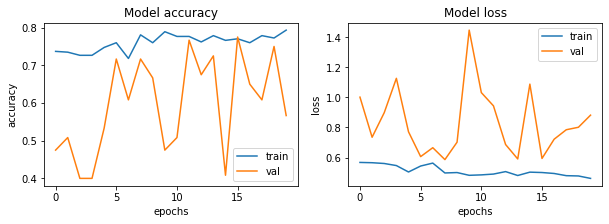

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# 3rd Iteration of Curriculum Learning

## Heatmap Variance 3

### Train data

In [ ]:
red_variance_train.clear()

In [ ]:
del train_df_sorted['red_variance']

In [ ]:
train_name_list=train_df_sorted['name'].to_list()

In [ ]:
for i in train_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/train/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/train/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_train.append(v_r)

In [ ]:
train_df_sorted['red_variance']=red_variance_train

In [ ]:
train_df_sorted=train_df_sorted.sort_values(by=['red_variance'])

### Val data

In [ ]:
red_variance_val.clear()

In [ ]:
del val_df_sorted['red_variance']

In [ ]:
val_name_list=val_df_sorted['name'].to_list()

In [ ]:
for i in train_name_list:
  img_array_positive = (get_img_array('/content/Skin_data/val/data/'+i, size=(150,150)))
  heatmap = make_gradcam_heatmap(img_array_positive, model, last_conv_layer_name, classifier_layer_names)
  #plt.matshow(heatmap)
  #plt.show()
  img = keras.preprocessing.image.load_img('/content/Skin_data/val/data/'+i)
  img = keras.preprocessing.image.img_to_array(img)

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  img=np.array(superimposed_img)
  img=img.astype('float')
  height, width,channel= img.shape
  # Cut out the target range
  boxFromX = 0 # start range X coordinate
  boxFromY = 0 # target range start position Y coordinate
  boxToX = width # target range end position X coordinate
  boxToY = height # target range end position Y coordinate
  # set in the order of y: y + h, x: x + w
  imgBox = img [boxFromY: boxToY, boxFromX: boxToX]
  # Output RGB mean and variance
  # One-dimensionalize with flatten and get average with mean
  #m_b = imgBox.T [0] .flatten (). mean ()
  #m_g = imgBox.T [1] .flatten (). mean ()
  #m_r = imgBox.T [2] .flatten (). mean ()
  # Get one-dimensional with flatten and get variance with variance
  #v_b = imgBox.T [0] .flatten ()
  #v_g = imgBox.T [1] .flatten ()
  v_r = imgBox.T [2] .flatten ()
  #v_b = variance (v_b)
  #v_g = variance (v_g)
  v_r = variance (v_r)
  red_variance_train.append(v_r)

In [ ]:
val_df_sorted['red_variance']=red_variance_val

In [ ]:
val_df_sorted=val_df_sorted.sort_values(by=['red_variance'])

## Using new dataframes for the image generators 3

In [ ]:
train_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=train_df_sorted,
directory="/content/Skin_data/train/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
subset="training",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 160 validated image filenames belonging to 2 classes.


In [ ]:
val_generator_sorted=data_generator_with_aug.flow_from_dataframe(
dataframe=val_df_sorted,
directory="/content/Skin_data/val/data/",
x_col="name",
y_col="meta.clinical.benign_malignant",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 20 validated image filenames belonging to 2 classes.


In [ ]:
test_generator=data_generator_no_aug.flow_from_dataframe(
dataframe=test_df,
directory="/content/Brain_data/test/head_ct/",
x_col="id",
y_col=" hemorrhage",
batch_size=16,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(150,150))

Found 20 validated image filenames belonging to 2 classes.


## Training model again 3

In [ ]:
history=model.fit(
       train_generator_sorted, # specify where model gets training data
       epochs = 20,
       steps_per_epoch=STEPS,
       validation_data=val_generator_sorted) # specify where model gets validation data

# Evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
model.save('/content/drive/MyDrive/CurriculumLearning/CurriculumLearning_ISICpart4.h5')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])